# IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

In [6]:
pip install keras

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import joblib
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
from IPython.display import Image as PImage

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import metrics

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar y vemos sus primeros registros

In [2]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamos2.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)


In [85]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1622022
Cantidad de variables: 35


# INCORPORACIÓN VARIABLE AL CONJUNTO DE DATOS ORIGINAL

### Incorporacion de la variable tasa de Politica monetaria promedio mensual

In [48]:
import pandas as pd

# Crear DataFrame con las tasas políticas
tasas_politicas = pd.DataFrame({
    'Periodo': ['202301', '202302', '202303', '202304', '202305', '202306', 
                '202307', '202308', '202309', '202310', '202311', '202312'],
    'Tasa_Politica': [75.00, 75.00, 76.55, 80.43, 94.29, 97.00, 
                      97.00, 109.19, 118.00, 127.68, 133.00, 118.10]
})

# Cargar el dataset original
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos2.csv')

# Asegurar que el tipo de dato de Periodo sea string
df_mora_prestamos['Periodo'] = df_mora_prestamos['Periodo'].astype(str)
tasas_politicas['Periodo'] = tasas_politicas['Periodo'].astype(str)

# Hacer el merge
df_final = df_mora_prestamos.merge(tasas_politicas, on='Periodo', how='left')

# Guardar el nuevo dataset
df_final.to_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_con_tasa_politica.csv', index=False)

# Mostrar información del merge
print(f"Registros en dataset original: {len(df_mora_prestamos)}")
print(f"Registros en dataset final: {len(df_final)}")
print("\nPrimeras filas del dataset final:")
print(df_final[['Periodo', 'Tasa_Politica']].head())

Registros en dataset original: 1622022
Registros en dataset final: 1622022

Primeras filas del dataset final:
  Periodo  Tasa_Politica
0  202301           75.0
1  202301           75.0
2  202301           75.0
3  202301           75.0
4  202301           75.0


Se corrobora que la variable se haya incoporado

In [50]:
import pandas as pd

num_registros = df_final.shape[0]  # Número de filas
num_variables = df_final.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1622022
Cantidad de variables: 36


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar por 'Periodo'
df_grouped = df_mora_prestamos.groupby('Periodo').agg({
    'TasaBADLAR_Promedio': 'mean',
    'Tasa_Politica': 'mean'
}).reset_index()

# Crear figura con tamaño específico
fig, ax1 = plt.subplots(figsize=(12, 7))

# Configurar el fondo del gráfico
ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

# Gráfico para Tasa BADLAR
line1 = ax1.plot(range(len(df_grouped)), df_grouped['TasaBADLAR_Promedio'], 
                 marker='o', linewidth=2, label='Tasa BADLAR', 
                 color='#1f77b4', markersize=8)

# Configuración del eje Y izquierdo (BADLAR)
ax1.set_ylabel('Tasa BADLAR (%)', fontsize=11, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Eje secundario para Tasa Política
ax2 = ax1.twinx()
line2 = ax2.plot(range(len(df_grouped)), df_grouped['Tasa_Politica'], 
                 marker='s', linewidth=2, label='Tasa Política', 
                 color='#ff7f0e', markersize=8)
ax2.set_ylabel('Tasa Política (%)', fontsize=11, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Configuración del eje X
ax1.set_xticks(range(len(df_grouped)))
ax1.set_xticklabels([f"{str(x)[:4]}-{str(x)[4:]}" for x in df_grouped['Periodo']], 
                    rotation=45, ha='right')
ax1.set_xlabel('Período', fontsize=11)

# Agregar grid suave
ax1.grid(True, linestyle='--', alpha=0.3)

# Título
plt.title('Evolución de Tasas BADLAR y Política\nEnero - Diciembre 2023', 
          fontsize=13, pad=20)

# Combinar leyendas
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Agregar etiquetas de valores de manera más limpia
for i, (badlar, politica) in enumerate(zip(df_grouped['TasaBADLAR_Promedio'], 
                                         df_grouped['Tasa_Politica'])):
    ax1.annotate(f'{badlar:.1f}%', 
                (i, badlar),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                color='#1f77b4',
                fontsize=9)
    
    ax2.annotate(f'{politica:.1f}%', 
                (i, politica),
                textcoords="offset points",
                xytext=(0,-15),
                ha='center',
                color='#ff7f0e',
                fontsize=9)

# Ajustar márgenes y layout
plt.tight_layout()

# Guardar el gráfico
plt.savefig('D:/Tesis/Definitivos/nuevo/comparacion_tasas.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')

# Mostrar el gráfi

### Busqueda de los mejores hiperparametros de LightGBM

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_final = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_con_tasa_politica.csv')

# Separar características y variable objetivo
X = df_final.drop('Morosidad', axis=1)
y = df_final['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Configurar el modelo base
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    verbose=-1
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = lgb.LGBMClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_lightgbm_Tasa_Politica.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 0.6
reg_lambda: 0.1
reg_alpha: 0.1
num_leaves: 127
n_estimators: 900
min_child_samples: 10
max_depth: -1
learning_rate: 0.05
colsample_bytree: 0.6

Mejor score (ROC-AUC): 0.9998

Métricas en conjunto de prueba:
ROC-AUC: 0.9998
Precision: 0.9912
Recall: 0.9790
F1-Score: 0.9851
Accuracy: 0.9983


### Metricas con mejores hiperparametros de LightGBM e importancias de caracteristicas

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import (roc_curve, auc, roc_auc_score, precision_score, 
                           recall_score, f1_score, accuracy_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Cargar datos
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_con_tasa_politica.csv')
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Configurar modelo con los mejores hiperparámetros
model = lgb.LGBMClassifier(
    subsample=0.6,
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=127,
    n_estimators=900,
    min_child_samples=10,
    max_depth=-1,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

print("Entrenando modelo LightGBM...")
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular métricas
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

metrics = {
    'ROC_AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Specificity': specificity,
    'F1_Score': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred)
}

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_results_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# 1. Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - LightGBM')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.savefig(f'{result_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - LightGBM')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig(f'{result_dir}/roc_curve.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Importancia de características
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
importance_df['importance_percentage'] = (importance_df['importance'] / 
                                       importance_df['importance'].sum() * 100)
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance_percentage', y='feature', data=importance_df.head(20))
plt.title('Top 20 Características Más Importantes - LightGBM')
plt.xlabel('Importancia (%)')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig(f'{result_dir}/feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Gráfico de Recall vs Specificity
plt.figure(figsize=(8, 6))
metrics_plot = [metrics['Recall'], metrics['Specificity']]
plt.bar(['Recall (Sensibilidad)', 'Especificidad'], metrics_plot, 
        color=['skyblue', 'lightgreen'])
plt.title('Recall vs Especificidad - LightGBM')
plt.ylim([0, 1])
for i, v in enumerate(metrics_plot):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.savefig(f'{result_dir}/recall_specificity.png', dpi=300, bbox_inches='tight')
plt.close()

# Guardar resultados
results = {
    'metrics': metrics,
    'confusion_matrix': cm.tolist(),
    'feature_importance': importance_df.to_dict(),
    'hyperparameters': model.get_params()
}

with open(f'{result_dir}/results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Imprimir resultados
print("\nResultados del modelo LightGBM:")
print("="*50)
print("\nMétricas:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nMatriz de Confusión:")
print(cm)

print("\nTop 10 características más importantes:")
print(importance_df.head(10)[['feature', 'importance_percentage']].to_string())

print(f"\nResultados guardados en: {result_dir}")

Entrenando modelo LightGBM...

Resultados del modelo LightGBM:

Métricas:
ROC_AUC: 0.9998
Precision: 0.9912
Recall: 0.9790
Specificity: 0.9995
F1_Score: 0.9851
Accuracy: 0.9983

Matriz de Confusión:
[[458658    242]
 [   581  27126]]

Top 10 características más importantes:
                               feature  importance_percentage
22               Deuda_Sist_Financiero               8.512346
27                          TotalDeuda               7.931217
23                  SituacionPonderada               7.507937
17         Importe_PrestamosPersonales               6.713404
1                              Nro Doc               6.320988
20  Plazo_Promedio_PrestamosPersonales               5.570547
31                      Tasa_Ponderada               5.201058
8                   CA_SaldoPromedio_$               4.992945
7                    CA_acreditaciones               4.288360
6                           Antiguedad               4.220459

Resultados guardados en: D:/Tesis/Definiti

### Aplicación de SHAP al conjunto de datos con la nueva variable (Tasa de Politica Monetaria)

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import json

# Cargar datos
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_con_tasa_politica.csv')
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Configurar y entrenar modelo con los mejores hiperparámetros
model = lgb.LGBMClassifier(
    subsample=0.6,
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=127,
    n_estimators=900,
    min_child_samples=10,
    max_depth=-1,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

print("Entrenando modelo LightGBM...")
model.fit(X_train, y_train)

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/lightgbm_shap_ranking_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# Calcular valores SHAP
print("\nCalculando valores SHAP...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Para clasificación binaria, tomamos la clase positiva

# 1. Graficar importancia global de variables (SHAP)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("Ranking de Variables por Importancia SHAP", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_importance_ranking.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Gráfico detallado de impacto de variables
plt.figure(figsize=(12, len(X.columns) * 0.5))
shap.summary_plot(shap_values, X, show=False)
plt.title("Impacto de Variables en las Predicciones", pad=20)
plt.tight_layout()
plt.savefig(f'{result_dir}/shap_impact_detail.png', dpi=300, bbox_inches='tight')
plt.close()

# Calcular importancia promedio absoluta de SHAP
shap_importance = pd.DataFrame({
    'Variable': X.columns,
    'SHAP_Importancia': np.abs(shap_values).mean(0),
    'SHAP_Importancia_Std': np.abs(shap_values).std(0)
})

# Calcular porcentaje de importancia
total_importance = shap_importance['SHAP_Importancia'].sum()
shap_importance['Porcentaje_Importancia'] = (shap_importance['SHAP_Importancia'] / total_importance) * 100

# Ordenar por importancia
shap_importance = shap_importance.sort_values('SHAP_Importancia', ascending=False)

# Guardar ranking en CSV
shap_importance.to_csv(f'{result_dir}/ranking_variables.csv', index=False)

# Crear visualización del ranking
plt.figure(figsize=(12, len(X.columns) * 0.3))
sns.barplot(data=shap_importance, 
            x='Porcentaje_Importancia', 
            y='Variable', 
            palette='viridis')
plt.title('Ranking de Variables por Importancia (%)', pad=20)
plt.xlabel('Porcentaje de Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.savefig(f'{result_dir}/ranking_visualization.png', dpi=300, bbox_inches='tight')
plt.close()

# Imprimir ranking
print("\nRanking de Variables por Importancia:")
print("="*50)
print(shap_importance[['Variable', 'Porcentaje_Importancia']].to_string(
    index=False,
    float_format=lambda x: f"{x:.2f}%"
))

# Guardar resultados completos
results = {
    'ranking': shap_importance.to_dict('records'),
    'top_10_variables': shap_importance.head(10)['Variable'].tolist()
}

with open(f'{result_dir}/shap_analysis_results.json', 'w') as f:
    json.dump(results, f, indent=4)

print(f"\nResultados guardados en: {result_dir}")
print("\nArchivos generados:")
print("1. shap_importance_ranking.png - Ranking visual de importancia SHAP")
print("2. shap_impact_detail.png - Detalle del impacto de variables")
print("3. ranking_variables.csv - Ranking completo en formato CSV")
print("4. ranking_visualization.png - Visualización del ranking")
print("5. shap_analysis_results.json - Resultados completos del análisis")

Entrenando modelo LightGBM...

Calculando valores SHAP...


C:\Users\Usuario\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29112\3563770560.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shap_importance,



Ranking de Variables por Importancia:
                          Variable  Porcentaje_Importancia
                SituacionPonderada                  23.91%
Plazo_Promedio_PrestamosPersonales                  14.82%
  Plazo_Maximo_PrestamosPersonales                   7.80%
                 Sit_Maxima_CENDEU                   5.33%
            Acreditaciones_sueldos                   5.03%
                 CA_acreditaciones                   3.96%
               TasaBADLAR_Promedio                   3.86%
                CA_SaldoPromedio_$                   3.45%
                    Tasa_Ponderada                   3.42%
       Importe_PrestamosPersonales                   3.33%
                        TotalDeuda                   2.92%
             Deuda_Sist_Financiero                   2.81%
      Cantidad_PrestamosPersonales                   2.80%
                         Localidad                   2.17%
              Otras_Acreditaciones                   1.65%
                 

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Cargando datos...
Preparando datos...
Entrenando modelo...
[LightGBM] [Info] Number of positive: 64699, number of negative: 1070716
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 1135415, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.056983 -> initscore=-2.806337
[LightGBM] [Info] Start training from score -2.806337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

C:\Users\Usuario\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



Generando matriz de correlación...


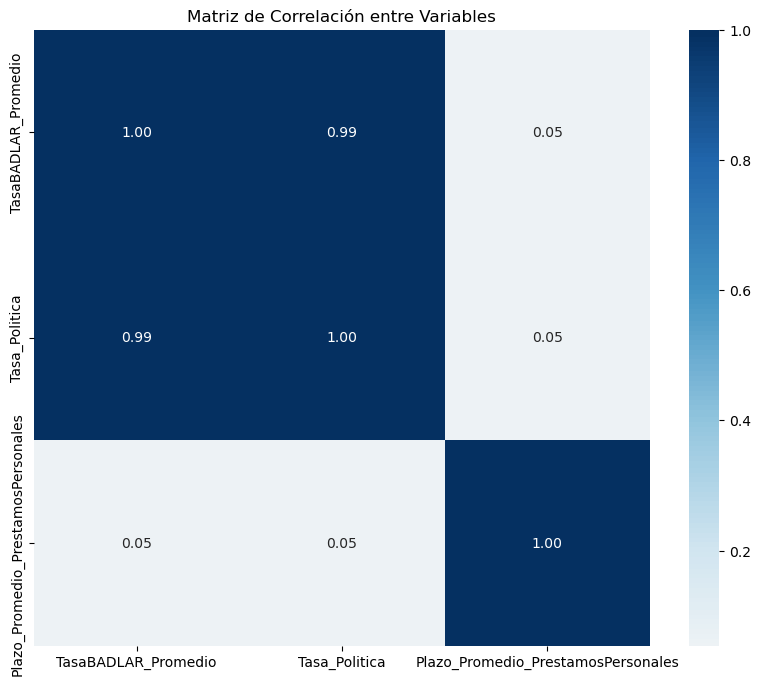


Generando gráficos de dependencia SHAP...


<Figure size 1200x700 with 0 Axes>

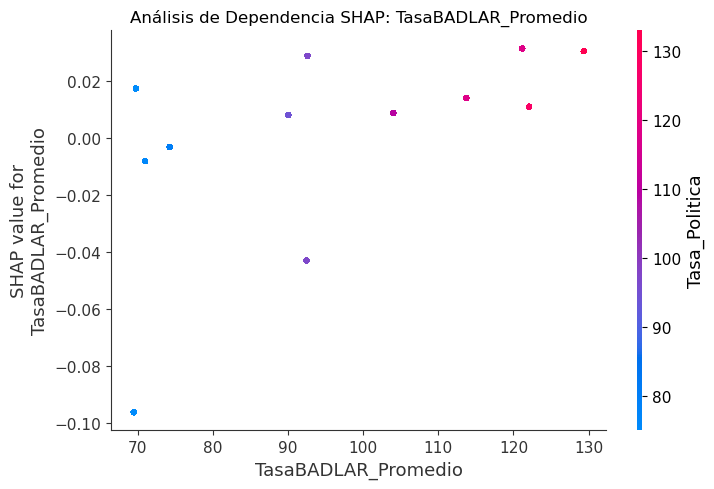

<Figure size 1200x700 with 0 Axes>

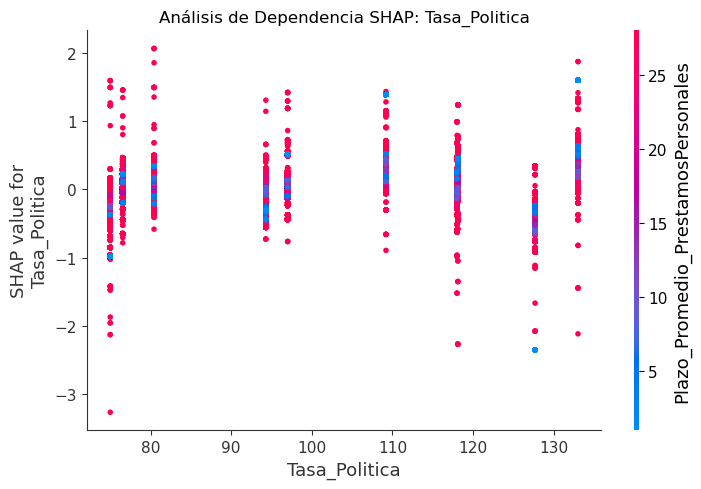

<Figure size 1200x700 with 0 Axes>

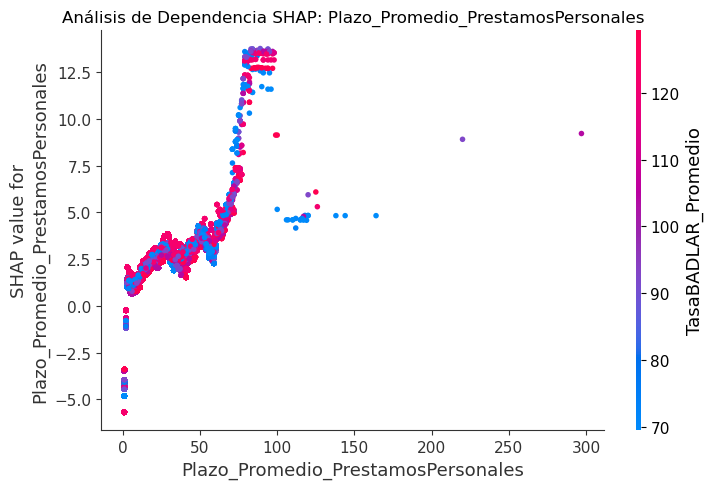


Generando gráfico de importancia global...


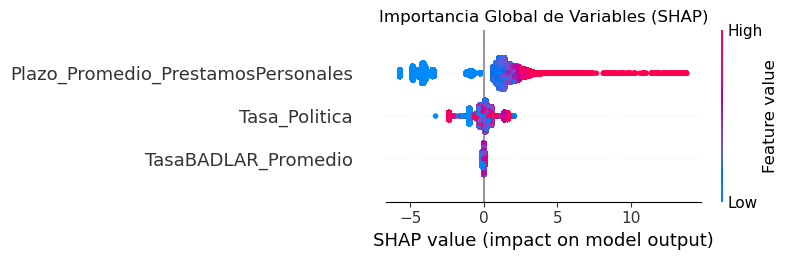

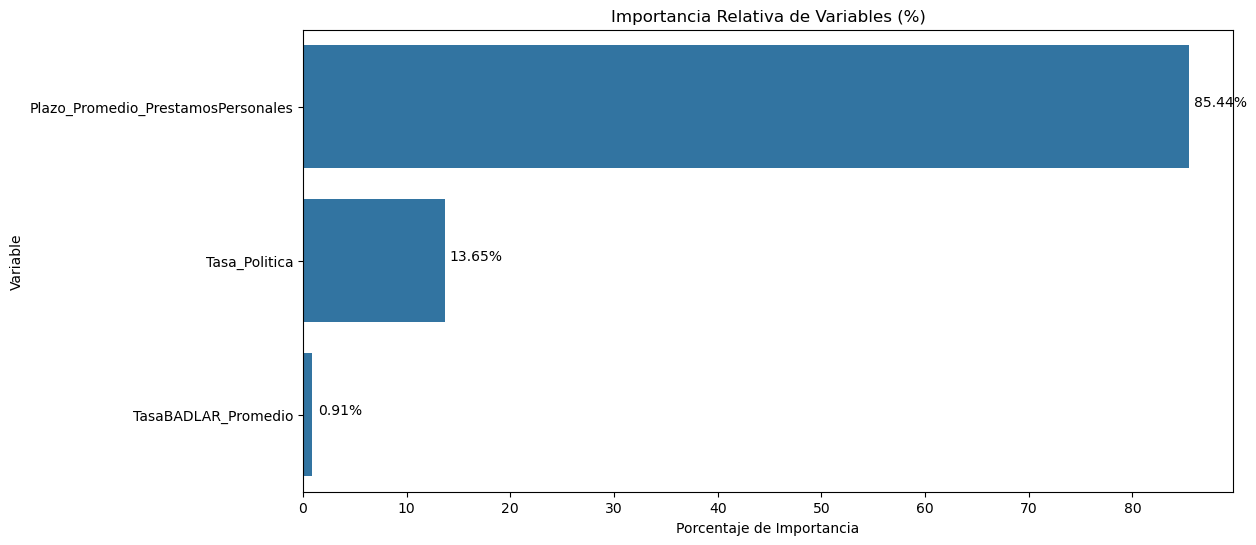


Resumen de Resultados:

Correlaciones entre variables:
                                    TasaBADLAR_Promedio  Tasa_Politica  \
TasaBADLAR_Promedio                              1.0000         0.9949   
Tasa_Politica                                    0.9949         1.0000   
Plazo_Promedio_PrestamosPersonales               0.0542         0.0539   

                                    Plazo_Promedio_PrestamosPersonales  
TasaBADLAR_Promedio                                             0.0542  
Tasa_Politica                                                   0.0539  
Plazo_Promedio_PrestamosPersonales                              1.0000  

Importancia de variables:
                          Variable  Porcentaje_Importancia
Plazo_Promedio_PrestamosPersonales                  85.44%
                     Tasa_Politica                  13.65%
               TasaBADLAR_Promedio                   0.91%

Estadísticas descriptivas de las variables:
       TasaBADLAR_Promedio  Tasa_Politica  Plaz

In [9]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar los datos
print("Cargando datos...")
df_nuevavariable = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_con_tasa_politica.csv')

# Variables predictoras y objetivo
X = df_nuevavariable[['TasaBADLAR_Promedio', 'Tasa_Politica', 'Plazo_Promedio_PrestamosPersonales']]
y = df_nuevavariable['Morosidad']

# Dividir datos
print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configurar y entrenar modelo
print("Entrenando modelo...")
lgbm_model = LGBMClassifier(
    subsample=0.6,
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=127,
    n_estimators=900,
    min_child_samples=10,
    max_depth=-1,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# Calcular valores SHAP
print("Calculando valores SHAP...")
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_test)
if isinstance(shap_values, list):
    shap_values_use = shap_values[1]
else:
    shap_values_use = shap_values

# 1. Matriz de Correlación
print("\nGenerando matriz de correlación...")
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Matriz de Correlación entre Variables')
plt.show()

# 2. Gráficos de dependencia SHAP
print("\nGenerando gráficos de dependencia SHAP...")
for column in X.columns:
    plt.figure(figsize=(12, 7))
    shap.dependence_plot(
        column, 
        shap_values_use, 
        X_test,
        show=False
    )
    plt.title(f'Análisis de Dependencia SHAP: {column}')
    plt.tight_layout()
    plt.show()

# 3. Importancia global de variables
print("\nGenerando gráfico de importancia global...")
plt.figure(figsize=(12, 7))
shap.summary_plot(
    shap_values_use, 
    X_test,
    show=False
)
plt.title('Importancia Global de Variables (SHAP)')
plt.tight_layout()
plt.show()

# 4. Calcular importancia de variables
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': np.abs(shap_values_use).mean(0),
    'Desviación_Estándar': np.abs(shap_values_use).std(0)
})
feature_importance['Porcentaje_Importancia'] = (feature_importance['Importancia'] / 
                                              feature_importance['Importancia'].sum() * 100)
feature_importance = feature_importance.sort_values('Importancia', ascending=False)

# Visualizar importancia de variables
plt.figure(figsize=(12, 6))
sns.barplot(x='Porcentaje_Importancia', 
            y='Variable', 
            data=feature_importance)
plt.title('Importancia Relativa de Variables (%)')
plt.xlabel('Porcentaje de Importancia')
plt.ylabel('Variable')
for i, v in enumerate(feature_importance['Porcentaje_Importancia']):
    plt.text(v + 0.5, i, f'{v:.2f}%')
plt.show()

# Imprimir resultados
print("\nResumen de Resultados:")
print("\nCorrelaciones entre variables:")
print(correlation_matrix.round(4))

print("\nImportancia de variables:")
print(feature_importance[['Variable', 'Porcentaje_Importancia']].to_string(
    index=False,
    float_format=lambda x: f'{x:.2f}%' if isinstance(x, float) else x
))

# Análisis estadístico básico
print("\nEstadísticas descriptivas de las variables:")
print(X.describe().round(4))